In [26]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from konlpy.tag import Okt  # 한글 자연어 처리 , 명사 형태소 추출 
from collections import Counter  #빈도 탐색 

from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer # TF-IDF 변환 진행 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
model = joblib.load('logistic.pkl')

model

LogisticRegression(C=2.0, max_iter=1000, n_jobs=-1, random_state=2021)

In [29]:
test_data_set = pd.read_csv('제주도 호텔리뷰(700).csv')
test_data_set.head()

,index,rating,text
0,NaN,5,숙소 엄철 깔끔합니다. 내부 인테리어도 아주 좋습니다. 중문에 렌트해서 방문한다면 ...
1,NaN,5,중문단지 인근이고 도로변이라 접근성이 좋다. 도로 가까이라 지나가는 차 소리에 시끄...
2,NaN,2,관광지와는 떨어져 있어서 조용히 보낼만 하지만 반대로 관광지랑 좀 거리가 있는 으슥...
3,NaN,1,룸을 너무 이쁘게 꾸며놔서 예약했는데.... 1박 이상은 비추합니다. 2박마다 청소...
4,NaN,4,조식을 제공하는 식당이나 음료마실 카페운영이 전혀 되질않아서 너무 아쉬웠어요~~ 로...


In [30]:
test_data_set.shape

(1396, 3)

In [31]:
#결측치 확인

test_data_set.isnull().sum()

index     1396
rating       0
text         0
dtype: int64

In [32]:
test_data_set.info() # 데이터 정보 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   0 non-null      float64
 1   rating  1396 non-null   int64  
 2   text    1396 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 32.8+ KB


In [33]:
def apply_new_set(text):
    korean = re.compile('[^ ㄱ-ㅣ 가-힣]') # 정규 표현식으로 단순 ㄱ 부터 ㅣ 까지 , 가 -힣 까지 한국어 추출 진행 
    result = korean.sub('', text) # 위 규칙을 테스트 셋 내에 text에 적용 
    return result # 결과 값 반환 

In [34]:
apply_new_set(test_data_set['text'][0]) #특수문자 제거 확인가능 

'숙소 엄철 깔끔합니다 내부 인테리어도 아주 좋습니다 중문에 렌트해서 방문한다면 어디든 가기 편리한 숙소입니다 추천할만합니다'

In [35]:
okt = Okt() # 명사 형태소 추출
nouns = okt.nouns(apply_new_set(test_data_set['text'][0]))
nouns

['숙소', '엄철', '내부', '인테리어', '아주', '중문', '렌트', '방문', '어디', '가기', '숙소', '추천']

In [36]:
# 말 뭉치 생성하기
corpus = "".join(test_data_set['text'].tolist())
nouns = okt.nouns(apply_new_set(corpus))

nouns  # 전체 말뭉치 중에서 명사 형태소 추출 

['숙소',
 '엄철',
 '내부',
 '인테리어',
 '아주',
 '중문',
 '렌트',
 '방문',
 '어디',
 '가기',
 '숙소',
 '추천',
 '중문',
 '단지',
 '인근',
 '도로',
 '변',
 '접근성',
 '도로',
 '가까이',
 '차',
 '소리',
 '걱정',
 '방음',
 '트윈룸',
 '박',
 '룸',
 '컨디션',
 '편이',
 '룸',
 '상태',
 '헤어드라이어',
 '어메니티',
 '미니',
 '냉장고',
 '생수',
 '병',
 '커피포트',
 '차',
 '등',
 '것',
 '무엇',
 '침구',
 '매우',
 '욕실',
 '샤워룸',
 '별도',
 '설치',
 '샴푸',
 '린스',
 '바디',
 '클린',
 '저',
 '등',
 '소셜커머스',
 '가격',
 '구매',
 '가능',
 '관광지',
 '반대',
 '관광지',
 '좀',
 '거리',
 '곳',
 '이동성',
 '카페나',
 '조식',
 '다룸',
 '예약',
 '박',
 '이상은',
 '박',
 '청소',
 '막상',
 '중간',
 '청소',
 '서비스',
 '쓰레기통',
 '유독',
 '쓰레기통',
 '한번',
 '주심',
 '매니',
 '티',
 '수건',
 '테이블',
 '마루',
 '바닥',
 '윗방',
 '소음',
 '소리',
 '방',
 '교체',
 '요청',
 '거절',
 '조식',
 '제공',
 '식당',
 '음료',
 '카페',
 '운영',
 '전혀',
 '로비',
 '의자',
 '내부',
 '시설',
 '전반',
 '느낌',
 '정적',
 '여행',
 '분',
 '장소',
 '미아',
 '밀',
 '시리즈',
 '가구',
 '사람',
 '더',
 '더욱',
 '안성맞춤',
 '갑자기',
 '부모님',
 '제주',
 '가게',
 '예약',
 '호텔',
 '정말',
 '제대로',
 '가구',
 '바닥',
 '나무',
 '먼지',
 '기분',
 '방도',
 '화장실',
 '부모님',
 '서도',
 '다음',
 '번',
 '또',
 '이용

In [37]:
# 빈도 탐색
counter = Counter(nouns)

counter.most_common(10) # 해당 명사가 얼마나 나왔는지를 탐색 너무많아서 가장많은 top10만 선정 

[('호텔', 757),
 ('수', 379),
 ('것', 344),
 ('위치', 318),
 ('직원', 313),
 ('곳', 306),
 ('방', 290),
 ('시설', 272),
 ('공항', 264),
 ('가격', 251)]

In [38]:
# 한글자 명사 제거 # 분석하는것에 있어서 한글자는 불필요하기 때문에 
one_word_delete = Counter({x: counter[x] for x in counter if len(x) > 1})

one_word_delete.most_common(10) # 한글자가 사라진걸 확인 가능 

[('호텔', 757),
 ('위치', 318),
 ('직원', 313),
 ('시설', 272),
 ('공항', 264),
 ('가격', 251),
 ('객실', 245),
 ('이용', 221),
 ('매우', 213),
 ('우리', 208)]

In [39]:
stopwords = pd.read_csv('korean stopwords.txt').values.tolist() # 한국 불용어 사전 참고하여 불필요한 단어들 제거 진행

# 불용어들 사전 추가
hotel_stopwords = ['제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립'] # 해당 단어들은 분석에 불필요 함으로 내용들 추가 
for word in hotel_stopwords:
    stopwords.append(word) # 해당 리스트 내용 저장 

In [40]:
# BoW 벡터 생성


def text_clean(text):
    korean = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규표현식 처리
    result = korean.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns_1 = okt.nouns(result)
    nouns_2 = [x for x in nouns_1 if len(x) > 1]  # 한글자 키워드 제거
    nouns_3 = [x for x in nouns_2 if x not in stopwords]  # 불용어 제거
    return nouns_3


vect = CountVectorizer(tokenizer=lambda x: text_clean(x))
bow_vect = vect.fit_transform(test_data_set['text'].tolist())
word_list = vect.get_feature_names()  # 리뷰 등장 단어
count_list = bow_vect.toarray().sum(axis=0)  

In [41]:
bow_vect.shape 

(1396, 3575)

In [42]:
word_dict = dict(zip(word_list, count_list))  # dict으로 위 출현 단어와 총 등장 횟수 묶기

word_dict

{'가가': 1,
 '가게': 8,
 '가격': 251,
 '가구': 10,
 '가급': 1,
 '가기': 25,
 '가까이': 17,
 '가끔': 7,
 '가나': 1,
 '가능': 6,
 '가도': 5,
 '가동': 3,
 '가드': 1,
 '가득': 1,
 '가든': 2,
 '가라': 3,
 '가량': 2,
 '가로': 2,
 '가면': 22,
 '가몬': 1,
 '가무': 1,
 '가방': 6,
 '가버': 1,
 '가성': 87,
 '가세': 4,
 '가수': 1,
 '가스레인지': 1,
 '가스렌지': 1,
 '가슴': 1,
 '가습기': 4,
 '가시': 5,
 '가신': 1,
 '가안': 2,
 '가야': 8,
 '가온': 1,
 '가요': 4,
 '가운': 1,
 '가운데': 5,
 '가을': 8,
 '가인': 2,
 '가장': 34,
 '가전': 1,
 '가정': 2,
 '가정식': 1,
 '가정은': 1,
 '가족': 97,
 '가지': 40,
 '가짓수': 3,
 '가치': 10,
 '가후': 1,
 '각각': 6,
 '각오': 1,
 '각자': 1,
 '각종': 3,
 '각층': 1,
 '간격': 1,
 '간다': 3,
 '간만': 3,
 '간식': 3,
 '간이': 3,
 '간직': 1,
 '간판': 1,
 '간호사': 1,
 '간혹': 1,
 '갈비탕': 1,
 '갈빠': 1,
 '갈수': 7,
 '갈치': 1,
 '감동': 13,
 '감명': 1,
 '감사': 4,
 '감상': 2,
 '감안': 7,
 '감자': 1,
 '감히': 2,
 '갑인': 1,
 '갑자기': 5,
 '값어치': 1,
 '강남': 1,
 '강력': 10,
 '강아지': 1,
 '강점': 1,
 '강추': 10,
 '강투': 1,
 '개관': 1,
 '개념': 1,
 '개미': 1,
 '개발': 1,
 '개방': 2,
 '개별': 1,
 '개보': 1,
 '개뿔': 1,
 '개선': 7,
 '개수대': 1,
 '개월': 2,
 '개인': 24,
 '개장': 1

In [43]:
# TF -IDF 변환
tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

tf_idf_vect.shape

(1396, 3575)

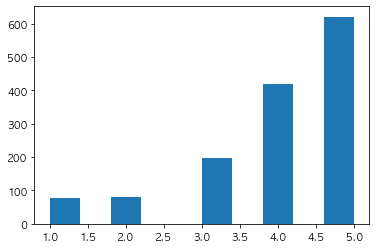

In [44]:
plt.hist(test_data_set['rating']) # 레이팅 시각화
plt.show() 

In [45]:
def add_label(rating):  # 3점이상일 경우 1 그 외 경우 0 으로 분류
    if rating > 3:
        return 1
    else:
        return 0


test_data_set['y'] = test_data_set['rating'].apply(lambda x: add_label(x))  # 분류하여 데이터셋 y 에 0 또는 1 표시

print(test_data_set['y'].value_counts()) # 1 or 0의 개수 표시  1 : 386 개 0 : 125개인것을 확인 

1    1041
0     355
Name: y, dtype: int64


In [46]:
positive_random_idx = test_data_set[test_data_set['y'] == 1].sample(275, random_state=12, replace=True).index.tolist()
negative_random_idx = test_data_set[test_data_set['y'] == 0].sample(275, random_state=12, replace=True).index.tolist()


random_idx = positive_random_idx + negative_random_idx

In [47]:
# 모델 Feature 변수는 리뷰에서 추출된 형태소와 그들의 중요도를 나타내는 tf_idf_vect로 대체

x = tf_idf_vect[random_idx]
y = test_data_set['y'][random_idx]

In [48]:
# Training set / Test set 나누기
x = tf_idf_vect[random_idx]  # 리뷰 , 단어
y = test_data_set['y'][random_idx]  # 0,1 에 대해 표시한 데이터 셋
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y, shuffle=True)
std = StandardScaler(with_mean=False)

In [50]:
print(f'dimension -> {np.ndim(x_train)}')
print(x_train.shape, y_train.shape)  # x_train , y_train의 형태
print(x_test.shape, y_test.shape)  # x_test , y_test의 형태
x_train_std = std.fit_transform(x_train, y_train)
x_test_std = std.fit_transform(x_test, y_test)

dimension -> 2
(440, 3575) (440,)
(110, 3575) (110,)


In [51]:
# 모델학습 Logistic Regression 모델 학습 (로지스틱 회귀 사용)
lr = model 
lr_predict = lr.predict(x_test_std)
lr_predict_probs = lr.predict_proba(x_test_std)
y_pred = lr.predict(x_test_std)
for i in lr_predict_probs:
    print(f'correct -> {i[0]*100} wrong -> {i[1]*100}') # 몇퍼센트확률로 맞는지 틀린지 예측 

correct -> 3.803973058123511 wrong -> 96.19602694187648
correct -> 4.714443895691145 wrong -> 95.28555610430885
correct -> 3.7485282852411594 wrong -> 96.25147171475884
correct -> 0.9668164852164041 wrong -> 99.0331835147836
correct -> 17.802083013868074 wrong -> 82.19791698613193
correct -> 8.188156308677952 wrong -> 91.81184369132205
correct -> 6.849649802768132 wrong -> 93.15035019723187
correct -> 8.901207591807747 wrong -> 91.09879240819225
correct -> 2.159318695467838 wrong -> 97.84068130453217
correct -> 16.516971318631757 wrong -> 83.48302868136824
correct -> 1.808744020277131 wrong -> 98.19125597972287
correct -> 25.07522577546809 wrong -> 74.92477422453192
correct -> 0.5955874832507035 wrong -> 99.40441251674929
correct -> 2.9986740196864314 wrong -> 97.00132598031357
correct -> 11.429433635189657 wrong -> 88.57056636481035
correct -> 1.4773444958176452 wrong -> 98.52265550418235
correct -> 1.251019331445602 wrong -> 98.7489806685544
correct -> 27.511943589914033 wrong -> 72.

In [52]:
print(lr_predict) # 예측 
print('정확성 (accuracy) : %.2f' % accuracy_score(y_test, y_pred))
print('정밀도 (precision) : %.2f' % precision_score(y_test, y_pred))
print('재현율 (recall) : %.2f' % recall_score(y_test, y_pred)) 
print('F1  : %.2f' % f1_score(y_test, y_pred)) # F1 socre 68프로 확인 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
정확성 (accuracy) : 0.54
정밀도 (precision) : 0.52
재현율 (recall) : 0.98
F1  : 0.68
